In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors

In [ ]:
# Load dataset
dataset = pd.read_csv('final_dataset.csv')
df = dataset.copy()

In [ ]:
# Preprocessing
df.drop(columns=['Unnamed: 0'], inplace=True)
df = df.astype(df.values).astype('float32')

In [2]:
# Extracting a reference dataset with 250 000 samples
df_ref = df.sample(n=250_000)
df_ref.shape[0]

In [ ]:
# Saving reference dataset's indexes to a file
reference_dataset_indexes = list()


for index, _ in df_ref.iterrows():
    reference_dataset_indexes.append(index)

import csv
  
with open('[KNN]reference_indexes.csv', 'w', newline='') as f:
    write = csv.writer(f) 
    write.writerow(['index'])
    write.writerows([element] for element in sorted(reference_dataset_indexes))

In [ ]:
# Exlude reference dataset's samples from entire data set to obtain data set for testing purposes
df_testing = df[~df.isin(df_ref)].dropna()

In [ ]:
print(f"Entire Data Set has {df.shape[0]} samples.")
print(f"Reference Data Set has {df_ref.shape[0]} samples.")
print(f"Testing Data Set has {df_testing.shape[0]} samples.")

Entire Data Set has 3577296 samples.
Reference Data Set has 250000 samples.
Testing Data Set has 3327296 samples.


In [ ]:
# Compute distances 
K = 5
neighbors = NearestNeighbors(n_neighbors=K)
neighbors.fit(df_ref.values)
distances, _ = neighbors.kneighbors(df_ref.values)

In [ ]:
distances_nei = distances.copy()

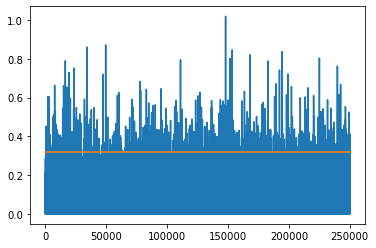

In [ ]:
plt.plot(distances_nei.mean(axis=1))
plt.plot([0,250_000], [np.percentile(distances_nei, 99.5), np.percentile(distances_nei, 99.5)])

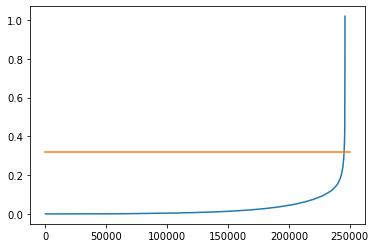

In [ ]:
distances_mean_non_zeros = distances_nei.mean(axis=1)[distances_nei.mean(axis=1) != 0]
distances_mean_non_zeros
plt.plot(np.sort(distances_mean_non_zeros))
plt.plot([0,250_000], [np.percentile(distances_nei, 99.5), np.percentile(distances_nei, 99.5)])

anomalous_distance_threshold = np.percentile(distances_nei, 99.5)

In [ ]:
anomalous_df = list()

start = time.time()

for index, row in df_testing.iterrows():
    distance, _ = neighbors.kneighbors([np.array(row.tolist())])
    if distance.mean() > anomalous_distance_threshold:
        anomalous_df.append(index)

stop = time.time() - start
avg_time = stop/df_testing.shape[0]
print(f"Avg processing time of single sample {avg_time}")

Avg processing time of single sample 0.0025146860093266427


In [ ]:
import csv
  
with open('[KNN]anonmalous_indexes.csv', 'w', newline='') as f:
    write = csv.writer(f) 
    write.writerow(['index'])
    write.writerows([element] for element in anomalous_df)

In [ ]:
print(f"Discovered {len(anomalous_df)} samples to be suspected as anomalous")

Discovered 21310 samples to be suspected as anomalous


In [ ]:
anomalous_full_df = df.iloc[anomalous_df,:]
anomalous_full_df.to_csv (r'C:\Users\msmen\MachineLearning\anomalous_dataset.csv', index = False, header=True)